## Waste Management using CNN Model


In [1]:
# Importing a necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
train_path = "dataset/TEST"
train_path = "dataset/TRAIN"

In [4]:
# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import  plot_model
from glob import glob

In [5]:
#Visualisation
x_data = [] 
y_data = [] 
for category in glob(train_path+"/*"): 
    for file in tqdm(glob(category+"/*")): 
        img_array = cv2.imread(file) 
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB) 
        x_data.append(img_array) 
        y_data.append(category.split('/')[-1]) 
data = pd.DataFrame({'image': x_data, "label": y_data})

100%|██████████| 9999/9999 [00:19<00:00, 525.88it/s]


In [6]:
data.shape

(22564, 2)

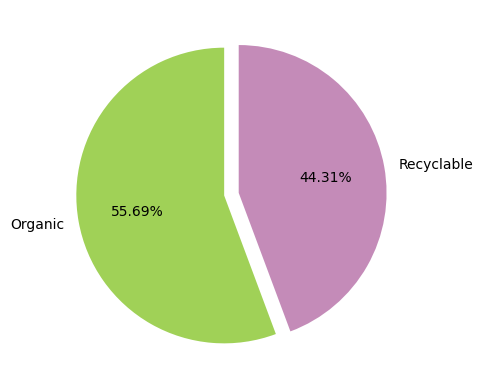

In [7]:
colors = ["#a0d157", "#c48bb8"] 
plt.pie(data.label.value_counts(), labels = ["Organic","Recyclable"], autopct = '%0.2f%%', colors = colors, startangle = 90, explode = [0.05, 0.05] ) #explode is optional 
plt.show()

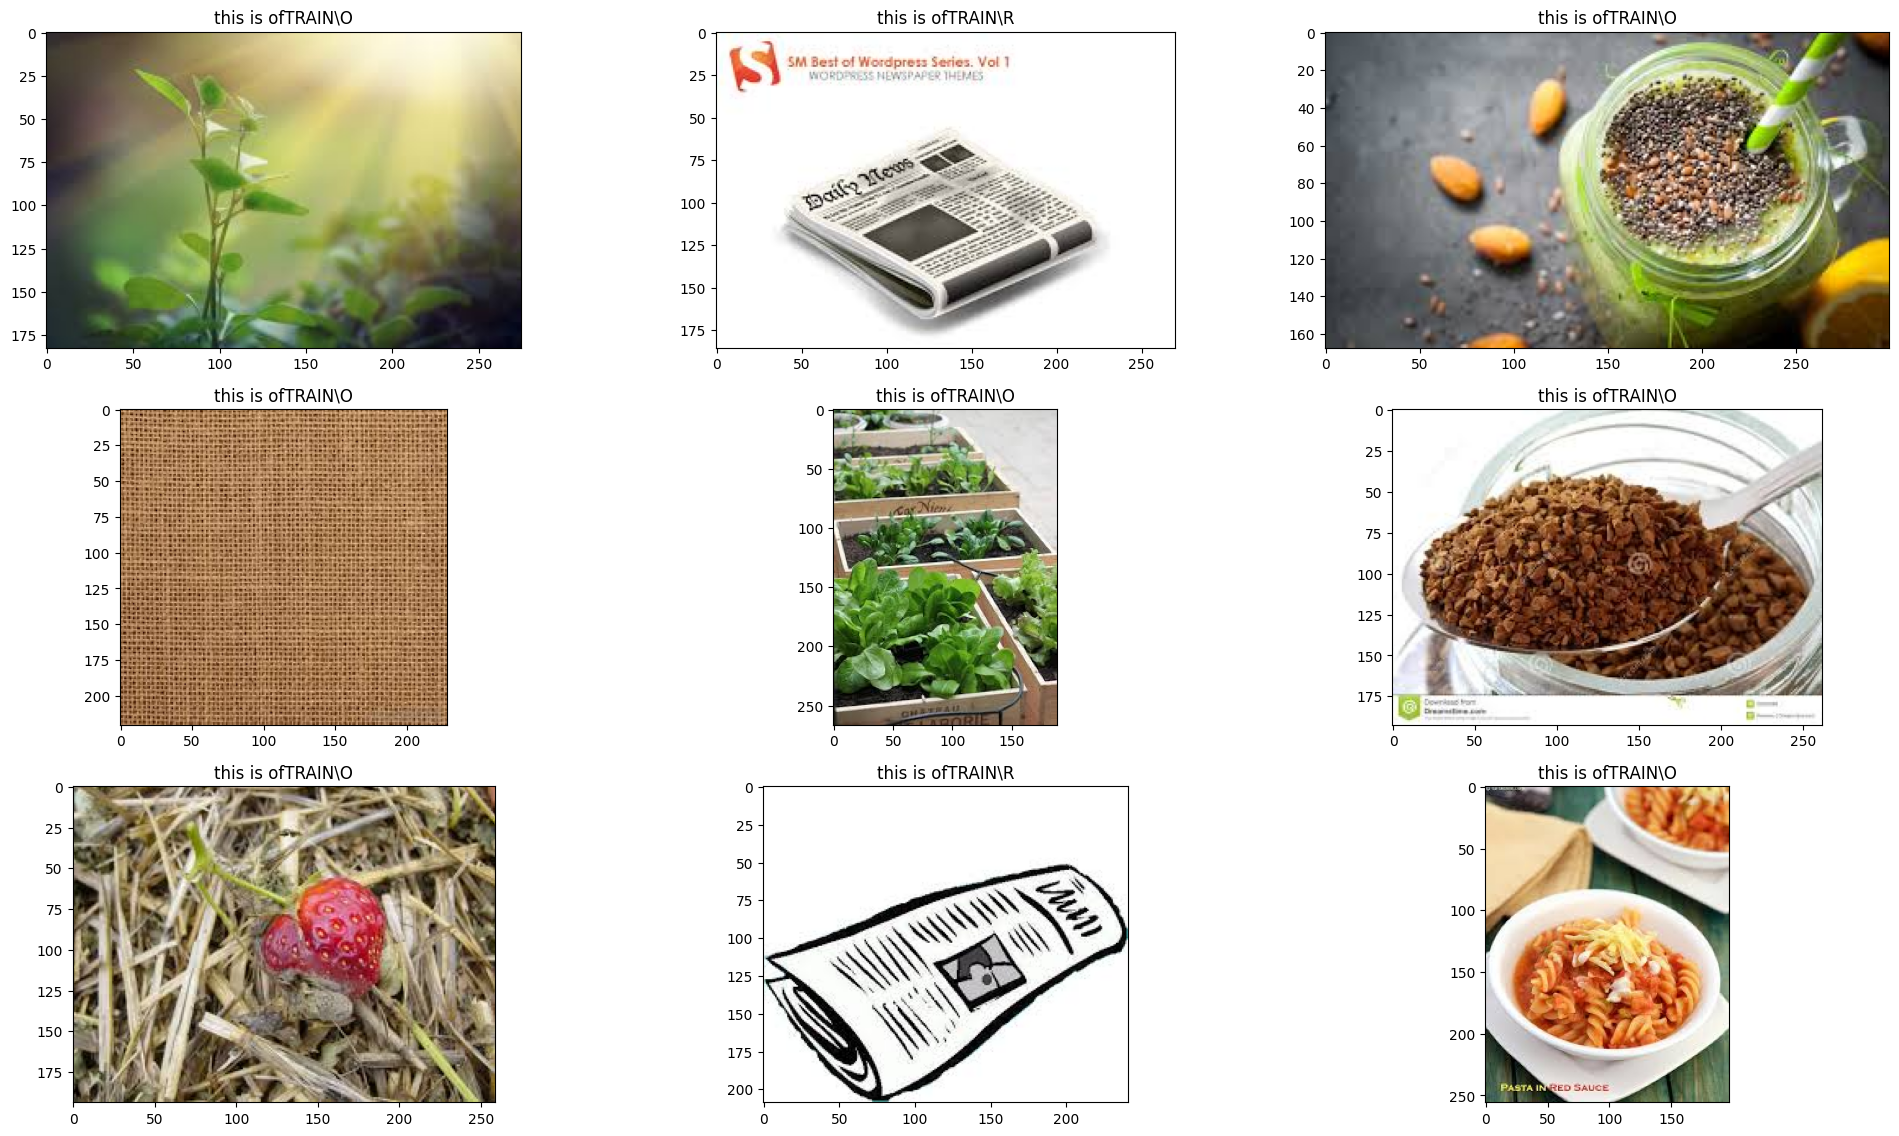

In [8]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, (i%12)+1)
    index = np.random.randint(15000)
    plt.title('this is of{0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

CNN - Convoultional nueral netweork

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(63, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0, 5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary-crossentropy",
             optimizer = "adam",
             metrics =["accuracy"])
batch_size = 256


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 63)   │        18,207 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 63)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 63)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        72,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,259,809 (84.91 MB)

 Trainable params: 22,259,809 (84.91 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    train_path, 
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 22564 images belonging to 2 classes.


In [14]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [15]:
hist = model.fit(
    train_generator,
    epochs=2,
    validation_data=test_generator
)

Epoch 1/2
89/89 ━━━━━━━━━━━━━━━━━━━━ 16771s 190s/step - accuracy: 0.7079 - loss: 0.6438 - val_accuracy: 0.8234 - val_loss: 0.4010
Epoch 2/2
89/89 ━━━━━━━━━━━━━━━━━━━━ 3528s 40s/step - accuracy: 0.8286 - loss: 0.4132 - val_accuracy: 0.8427 - val_loss: 0.3732


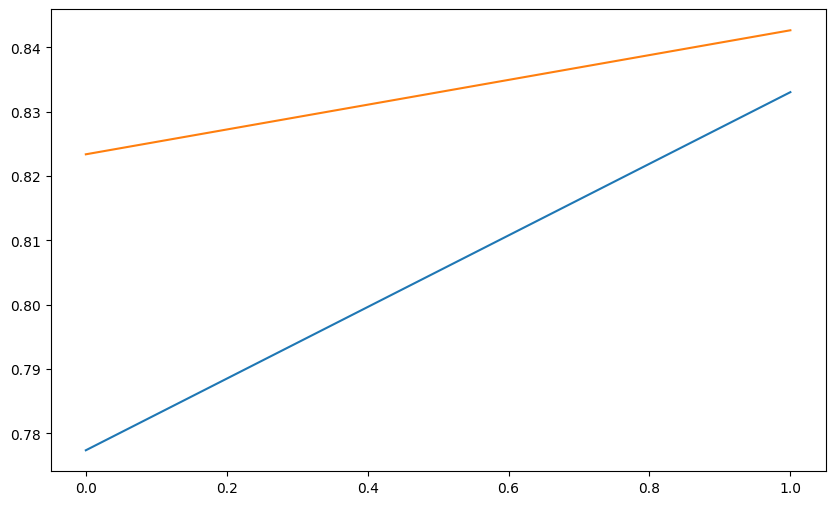

In [16]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.show()

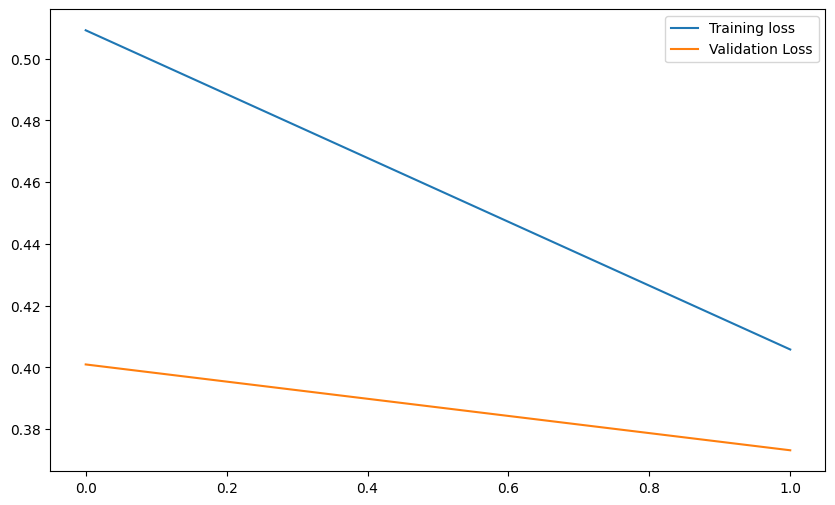

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(hist.history['loss'], label='Training loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [18]:
def predict_fun(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224, 3])
    result = np.argmax(model.predict(img))
    if result == 0:
        print('The image shown is Recyckable waste')
    elif result == 1:
        print('The image shown is Organic Waste')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step
The image shown is Organic Waste


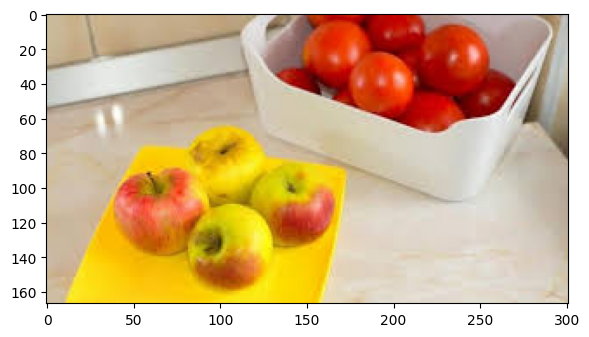

In [19]:
test_img = cv2.imread('dataset/TEST/O/O_13956.jpg')
predict_fun(test_img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
The image shown is Organic Waste


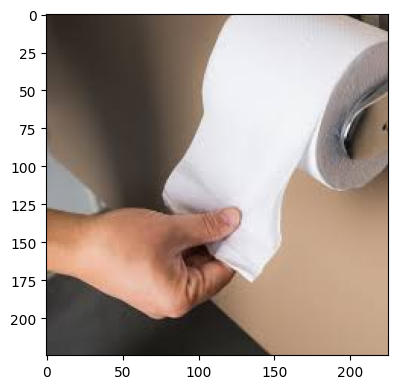

In [20]:
test_img = cv2.imread('dataset/TEST/R/R_11101.jpg')
predict_fun(test_img)